In [1]:
#Classification - kisi ölmüs mü kalmis mi? sorusu cevap evet hayir

In [2]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [3]:
df1=pd.read_csv("ttrain.csv")

In [4]:
df2=pd.read_csv("ttest.csv")

In [5]:
# soru: train dosyasiyla modeli egitip test dosyasindaki verileri tahmin etmeniz gerekiyor
# basari orani kaggle verecek, basari orani kaggle yükleyecez
#kaggle > 0.40 basariyiz

# EDA - Exploratory Data Analaysis

In [6]:
df1.shape

(891, 12)

In [7]:
df2.shape # neden 11 sutun? bu kisi hayatta mi bilmiyoruz, Survived sutun yok

(418, 11)

In [8]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,NaN,S


In [9]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [10]:
# survived sutun dan modeli egitmemizi istiyor model
# ve olmayan sutunu tahin etmemizi istiyor
# ancak bu veri de bir problem var: bazi veriler eksik
# eksikleri nasil tamamliyacagiz?
# iki seyi birlestiriyoruz

In [11]:
df=df1.append(df2)

In [12]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
799,800,0.0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.15,NaN,S


In [13]:
df.shape

(1309, 12)

In [14]:
# bos yeri var mi yok mu? daha önce bos veri nasil doldurulu yapmadik
df.info()
#pclass 1. sinif mi 2. sinif mi 3. sinif mi
#SibSp gemi de kardesi var mi
#Parch gemi de ailesi var mi
#Fare ödedigi para
#embarked handi limandan bindi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
df.isnull().sum() # 418 hayatta kaldi mi? soru bu, bunu tahmin edecegiz

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
# veri adedi (df.shape den bak) 1309/1014 (Cabin eksik aded) = 0,77 - verinin 77% bos
# bir sutun da veri 20% den fazlasi bos ise o sutunu silebilirz
# istedigimiz sonuca ulasamasak ve o sutuna illa ihtiyac varsa ekleyin

* bos veri doldurmanin 8 farkli yöntemi var
* 1 Mean - ortalama
* 2 Median - Orta Deger
* 3 En Yakin Komsu
* 4 Regression
* 5 Fforward
* 6 Bbackword
* 7 En uygun olani ile dolduruyor (all of the above)

In [17]:
# Fare'i doldurmaya baslayalim - rakam oldugu icin mesela mean veya median ile

In [18]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414)

In [19]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [20]:
import seaborn as sns

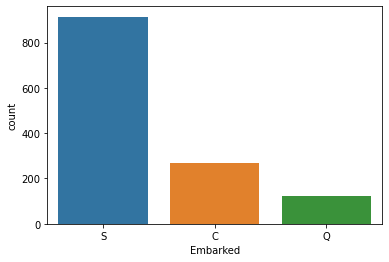

In [21]:
sns.countplot(x=df['Embarked']); # rakam degil yazi, en cok tekrar eden neyse onunla doldurma daha mantikli

In [22]:
df["Embarked"].mode() # mode en cok tekrar eden demek

0    S
Name: Embarked, dtype: object

In [23]:
df['Embarked'].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [24]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode)
# veya df['Embarked']=df['Embarked'].fillna("S") - bildigimiz icin

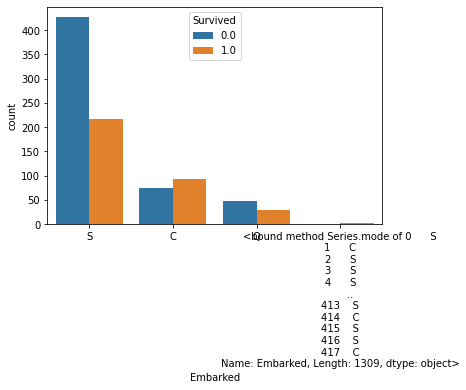

In [25]:
sns.countplot(x='Embarked',hue='Survived',data=df);

In [26]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [27]:
# cabin de 20% fazlazi bos diye silecegiz

In [28]:
del df['Cabin']
#df.drop(['Cabin'],axis=1,inplace=True) - burda 1 den fazla sutun silmek icin 'Cabin', 'Ticket', '..',..

In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
349,1241,NaN,2,"Walcroft, Miss. Nellie",female,31.0,0,0,F.C.C. 13528,21.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
862,863,1.0,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,S
90,982,NaN,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,S
517,518,0.0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,Q
137,138,0.0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,S
302,1194,NaN,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,S
391,392,1.0,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,S
832,833,0.0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,C
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C


In [32]:
#Feature Engineering

In [33]:
#ünvan sutun ilave ediyoruz
        #df name icinde   cikart , boslugu ve noktada dur
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [35]:
del df['Name'] #Title var diye Name sutun cikabilir

In [36]:
df['Title'].unique() # Title'in icinde neler var

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [37]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

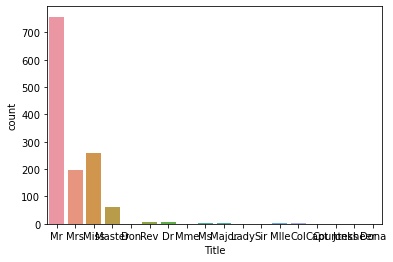

In [38]:
sns.countplot(x=df['Title']);

In [39]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [40]:
# 1 rakamlilari Mr. gibi seyler ekleyebiliriz, nasil yapacagiz?
#replace(neleri degis, nelerle degis)
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [41]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [42]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [43]:
# Kadinlarin ve Erkleklerin yas ortalamarini bulalim

In [44]:
# hangi gruplara göre topla?
# "Sex", cinsiyete göre topla, yasini bul, yasin ortalamasini al
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [45]:
df[df['Age']<18]["Age"].mean() # 18 yas altindakilerin ortalamasi

9.101753246753248

In [46]:
# Title'in icinden Age'i al, Age'in orta degeri ile doldur
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [47]:
df.isnull().sum() # artik bütün verilerimiz dolu. bos olan yok
#sadece tahmin etmemiz gereken 418 var

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [48]:
# bir de aile sayisi cok önemli - yine Feature Engineering

In [49]:
# gemideki kardes sayisini aliyoruz
# kardesleri + ailesi + 1(Kendisi) = Ailesinin büyüklügü
df["Family"]=df["SibSp"]+df["Parch"]+1
#aile olmasi hayatta kalmasi riskini arttiriyor

In [50]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [51]:
# verilerde Passenger-Id'nin bir önemin olmadigini düsünüyoruz, Ticket de ayni
# lakin bir fark edecekse bir ilave ederek bakriz bir de silerek sonra mesela ilave ederek daha iyi oran cikti diye yazariz

In [52]:
# inplace=True df'ye yeni esitleme gerekmiyor yani bu aslinda df=df.drop...
df.drop(["PassengerId","Ticket"],axis=1,inplace=True)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [54]:
# simdi yazilari rakamlara cevirmemiz lazim - ne yapiyoruz? --> get_dummies
# asil veriyi bozmamak icin data diyoruz

In [55]:
data=pd.get_dummies(df,drop_first=True)
#drop_first yerine drop_last da diyebiliriz

In [56]:
data.head() #sparse Matrix olustugunu görüyoruz - artik verimiz hazir

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,1,0,1,0


In [57]:
#train ve testi ayiriyoruz (basta birlestirdik veriyi hazir hale getirdik, simdi bölüyrouz)

In [58]:
#df'nin icersinden basi ne olursa olsun ilk 891 aliyoruz --> ttrain.csv de 891 satir sayisi vardi
train=data[:891]
#test icin 891'den basla ve kalani al
test=data[891:]

In [59]:
# y'ye yani hedefe survivor sutun icersini eklicez

In [60]:
y=train["Survived"]

In [61]:
# x'e de kalan sutunlari esitlestircez

In [62]:
x=train.drop("Survived",axis=1) # burda Survived'i silip diger hepsini ekliyor

In [63]:
# import Machine Learning methods/Algos

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

g=GaussianNB()
b=BernoulliNB()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()
s=SVC()
k=KNeighborsClassifier()

In [65]:
# simdi fit ve predict yapabiliriz

In [66]:
g.fit(x,y)
b.fit(x,y)
d.fit(x,y)
r.fit(x,y)
gb.fit(x,y)
s.fit(x,y)
k.fit(x,y)
# iki modelimizi de egittik, simdi tahmin edecegiz

KNeighborsClassifier()

In [67]:
test.head() # test de Survived eskiden yoktu ama simdi var, silmemiz lazim

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,0,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,0,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,0,1,0,0,1


In [68]:
del test["Survived"] # bunu tahmin edecegimiz icin sildik

In [69]:
tahmin1=k.predict(test)

In [70]:
#[...] Array oluyor, [[...]] Data frame oluyor, ozaman excel dosyasina benziyor ve onu "şey"(?) yapabilyorum
sonuc=df2[["PassengerId"]]

In [71]:
#sonuca yeni bir sutun ekliyorum --> tahminlerimizi
sonuc["Survived"]=tahmin1

In [72]:
sonuc # Survived float olarak, integer degil, int'e  cevir

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [73]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

In [74]:
sonuc # en soldaki sütün (index sutun görmemek istiyoruz)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
sonuc.to_csv("titanicprediction-KNeighbour.csv",index=False) # index sutunu almiyor

In [76]:
#Ödev: Diger methodlari yükleyip Kaggle'den ekran görünntü + bu cod yüklicez